<a href="https://colab.research.google.com/github/Usamaahmad06/Avalanche-an-end-to-end-library-for-continual-learning/blob/main/fashionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install avalanche-lib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 971.9/971.9 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.4/532.4 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.

In [2]:
!pip install avalanche-lib torch torchvision matplotlib

100%|██████████| 26421880/26421880 [00:14<00:00, 1868507.66it/s]


Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 138651.84it/s]


Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2499894.55it/s]


Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 14589376.35it/s]


Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



/usr/local/lib/python3.10/dist-packages/avalanche/training/templates/base.py:468: PositionalArgumentsDeprecatedWarning: Avalanche is transitioning to strategy constructors that accept named (keyword) arguments only. This is done to ensure that there is no confusion regarding the meaning of each argument (strategies can have many arguments). Your are passing 3 positional arguments to the Naive.__init__ method. Consider passing them as names arguments. The ability to pass positional arguments will be removed in the future.
  warnings.warn(error_str, category=PositionalArgumentsDeprecatedWarning)
/usr/local/lib/python3.10/dist-packages/avalanche/training/templates/base.py:468: PositionalArgumentsDeprecatedWarning: Avalanche is transitioning to strategy constructors that accept named (keyword) arguments only. This is done to ensure that there is no confusion regarding the meaning of each argument (strategies can have many arguments). Your are passing 3 positional arguments to the Replay.__

Running Naive strategy
-- >> Start of training phase << --
100%|██████████| 375/375 [00:08<00:00, 44.77it/s]
Epoch 0 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.6856
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.6875
100%|██████████| 375/375 [00:08<00:00, 46.51it/s]
Epoch 1 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.7774
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.6875
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 63/63 [00:01<00:00, 48.77it/s]
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.7890
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 63/63 [00:01<00:00, 59.55it/s]
> Eval on experience 1 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp001 = 0.7810
-- Starting eval on experience 2 (Task 0) from test stream --
100

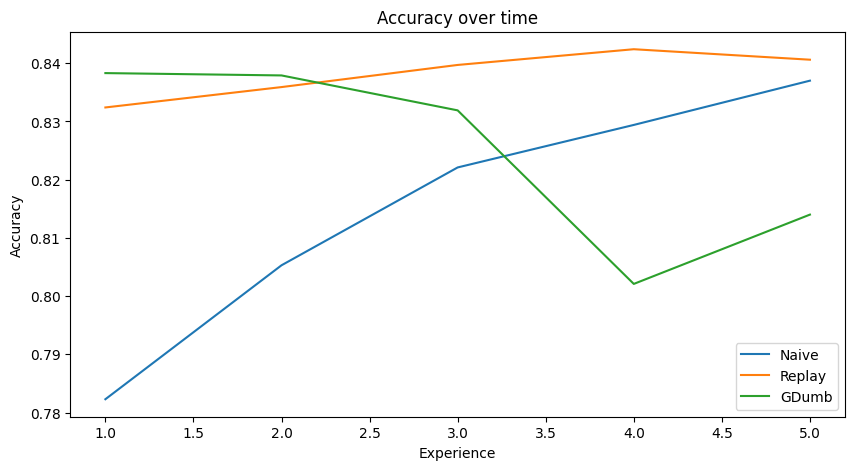

In [3]:
import torch
from torch.nn import CrossEntropyLoss
from torch.optim import SGD
from torchvision import datasets, transforms
from avalanche.benchmarks import dataset_benchmark
from avalanche.evaluation.metrics import accuracy_metrics
from avalanche.logging import InteractiveLogger, TextLogger
from avalanche.training.plugins import EvaluationPlugin
from avalanche.training.supervised import Naive, Replay, GDumb
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Subset

# Transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load datasets
train_dataset = datasets.FashionMNIST('/content/', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST('/content/', train=False, download=True, transform=transform)

# Split dataset into experiences
train_indices = list(range(len(train_dataset)))
test_indices = list(range(len(test_dataset)))
train_experiences = [Subset(train_dataset, train_indices[i::5]) for i in range(5)]
test_experiences = [Subset(test_dataset, test_indices[i::5]) for i in range(5)]

scenario = dataset_benchmark(train_datasets=train_experiences, test_datasets=test_experiences)

# Model definition
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(28 * 28, 512),
    torch.nn.ReLU(),
    torch.nn.Linear(512, 10)
)

# Loss function and optimizer
criterion = CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.01)

# Evaluation plugin
interactive_logger = InteractiveLogger()
text_logger = TextLogger(open('log.txt', 'w'))
eval_plugin = EvaluationPlugin(
    accuracy_metrics(minibatch=True, epoch=True, experience=True, stream=True),
    loggers=[interactive_logger, text_logger]
)

# Strategies
strategies = {
    'Naive': Naive(model, optimizer, criterion, train_mb_size=32, train_epochs=2, eval_mb_size=32, evaluator=eval_plugin),
    'Replay': Replay(model, optimizer, criterion, train_mb_size=32, train_epochs=2, eval_mb_size=32, evaluator=eval_plugin, mem_size=200),
    'GDumb': GDumb(model, optimizer, criterion, train_mb_size=32, train_epochs=2, eval_mb_size=32, evaluator=eval_plugin, mem_size=200)
}

# Run strategies and collect results
results = {}
for strategy_name, strategy in strategies.items():
    print(f'Running {strategy_name} strategy')
    results[strategy_name] = []
    for experience in scenario.train_stream:
        strategy.train(experience)
        eval_results = strategy.eval(scenario.test_stream)
        acc = eval_results['Top1_Acc_Stream/eval_phase/test_stream/Task000']
        results[strategy_name].append(acc)

# Plotting results
plt.figure(figsize=(10, 5))
for strategy_name, accuracies in results.items():
    plt.plot(range(1, len(accuracies) + 1), accuracies, label=strategy_name)
plt.xlabel('Experience')
plt.ylabel('Accuracy')
plt.title('Accuracy over time')
plt.legend()
plt.show()